## Experiment 02: Comparison of different metrics as replacement for accuracy
Testing different metrics for training and evaluation. <br>
**Problem**: The standard accuracy metric in Keras is the binary accuracy $a=\sum_{i}^{l}{(round(\hat{y}_{i})==y_{i}})/l$ for $l$ components of the output vector. Components larger than 0.5 are interpreted as **correct** (1), below 0.5 as **incorrect** (0). This only makes sense in a classification setting, where the outputs can only be binary. For regression problems, where the **correct** output can be any real number, this metric is no good estimator of accuracy. In this experiment we're going to take a look at different other metrics as potential estimators for accuracy. <br>

In [4]:
import sys; sys.path.insert(0, '..')
import models
from keras.utils import plot_model
import dataset
import matplotlib.pyplot as plt
import random
random.seed(1337)

In [5]:
n = 1
batch_size = 32
n_epochs = 30
latent_dim = 16

train_gen = dataset.BatchGenerator(dataset.x_train, n, batch_size)
test_gen = dataset.BatchGenerator(dataset.x_test, n, batch_size)

$MSE = \frac{1}{l}\sum_l{(\hat{y_i}-y_i)^2}$ for $l$ components of the output vector. For gradient descend and batch gradient descend this, again, is averaged over the training/test set/batch. <br>
MSE amplifies larger errors (>1) and deemphasizes smaller ones (<1).

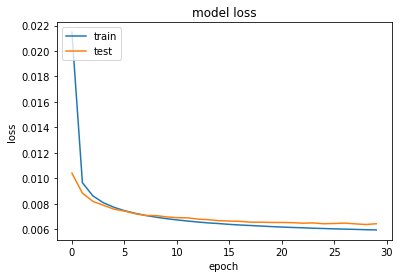

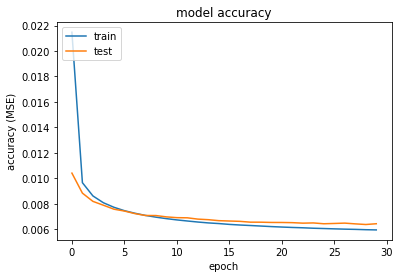

In [6]:
from keras.metrics import MeanSquaredError

cae = models.build_CAE(16)
cae.compile(loss='mse', optimizer='adam', metrics=[MeanSquaredError()])
history = cae.fit(train_gen, validation_data=test_gen, epochs=n_epochs, verbose=False)

# Plot accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot accuracy
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model accuracy')
plt.ylabel('accuracy (MSE)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

$BCE = -\frac{1}{l}\sum_l{y_i log(\hat{y_i})+(1-y_i) log(1-\hat{y_i})}$ is a useful metric for **classification** problems. Since the components of the truth vector $y$ are binary one summand always vanishes, while the other reduces to the log term. The error is then computed between $[0,1]$ of the log-function, so that, similar to MSE, large errors are (exponentially) amplified while smaller ones are deemphasized. BCE can also be used as a metric for continuous truth vectors, however (pixel-wise) errors below a truth (component) value of 0.5 are more panalized than errors above. Compare for example (0.3,0.4) to (0.5,0.7) as ($\hat{y}, y$) values.

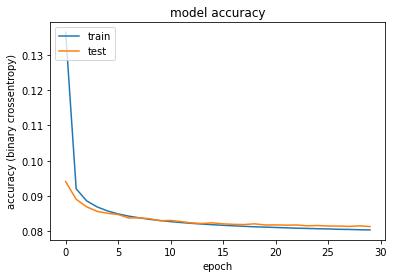

In [4]:
from keras.metrics import BinaryCrossentropy

cae = models.build_CAE(16)
cae.compile(loss='mse', optimizer='adam', metrics=[BinaryCrossentropy()])
history = cae.fit(train_gen, validation_data=test_gen, epochs=n_epochs, verbose=False)

# Plot accuracy
plt.plot(history.history['binary_crossentropy'])
plt.plot(history.history['val_binary_crossentropy'])
plt.title('model accuracy')
plt.ylabel('accuracy (binary crossentropy)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

$MAE = \frac{1}{l}\sum_l{|y_i-\hat{y_i}|}$. The mean absolute error. No penalization bias.

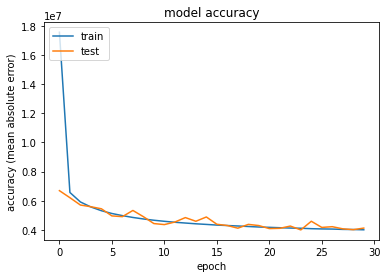

In [5]:
from keras.metrics import MeanAbsoluteError

cae = models.build_CAE(16)
cae.compile(loss='mse', optimizer='adam', metrics=[MeanAbsolutePercentageError()])
history = cae.fit(train_gen, validation_data=test_gen, epochs=n_epochs, verbose=False)

# Plot accuracy
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['val_mean_absolute_percentage_error'])
plt.title('model accuracy')
plt.ylabel('accuracy (mean absolute error)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

$CS=\frac{y\cdot\hat{y}}{||y|| ||\hat{y}||}$. Cosine similarity is defined via the dot product between the prediction vector **$\hat{y}$** and the truth vector $y$. It is a measure of how similar the two n-dimenional vectors are (-1=exactly opposite, 0=orthogonal/not correlated, 1=exactly the same). 

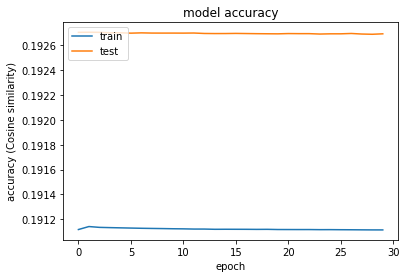

In [8]:
from keras.metrics import CosineSimilarity

cae = models.build_CAE(16)
cae.compile(loss='mse', optimizer='adam', metrics=[CosineSimilarity()])
history = cae.fit(train_gen, validation_data=test_gen, epochs=n_epochs, verbose=False)

# Plot accuracy
plt.plot(history.history['cosine_similarity'])
plt.plot(history.history['val_cosine_similarity'])
plt.title('model accuracy')
plt.ylabel('accuracy (Cosine similarity)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

$LCE=log(cosh(\hat{y}-y))$. The closer $\hat{y}-y$ is to 0, the closer the cosh to 1 and the closer $log(cosh(\hat{y}-y))$ to 0. 

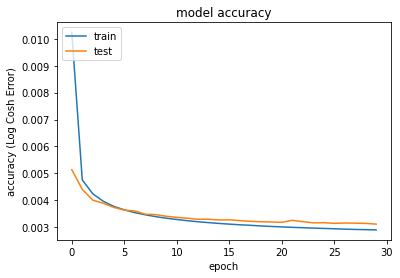

In [7]:
from keras.metrics import LogCoshError

cae = models.build_CAE(16)
cae.compile(loss='mse', optimizer='adam', metrics=[LogCoshError()])
history = cae.fit(train_gen, validation_data=test_gen, epochs=n_epochs, verbose=False)

# Plot accuracy
plt.plot(history.history['logcosh'])
plt.plot(history.history['val_logcosh'])
plt.title('model accuracy')
plt.ylabel('accuracy (Log Cosh Error)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

$KLD=\sum_l{y_ilog\frac{y_i}{\hat{y_i}}}$ is a measure of error between two probability distributions. Information theory says KLD is the error of some crossentropy function $H(p,q)=-\sum_i{p_i log_2(q_i)}$ to the Shannon entropy $H(p)=\sum_i{p_i log_2(p_i)}$. Interpreting entropy as the average core information content of a message and cross-entropy as the average message length (w.r.t. some encoding) the KL-divergence is a direct measure of the encoding's performance. This sounds like an interesting loss function, indeed variational autoencoders typically implement a KLD term in their loss function for regularization purposes.

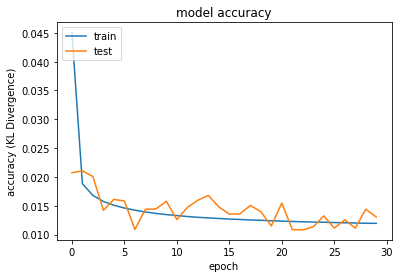

In [8]:
from keras.metrics import KLDivergence

cae = models.build_CAE(16)
cae.compile(loss='mse', optimizer='adam', metrics=[KLDivergence()])
history = cae.fit(train_gen, validation_data=test_gen, epochs=n_epochs, verbose=False)

# Plot accuracy
plt.plot(history.history['kullback_leibler_divergence'])
plt.plot(history.history['val_kullback_leibler_divergence'])
plt.title('model accuracy')
plt.ylabel('accuracy (KL Divergence)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

$P=\frac{1}{l}\sum_l{\hat{y_i}-y_ilog\hat{y_i}}$ is used for count data. ["Minimizing the Poisson loss is equivalent of maximizing the likelihood of the data under the assumption that the target comes from a Poisson distribution, conditioned on the input."](https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/poisson)

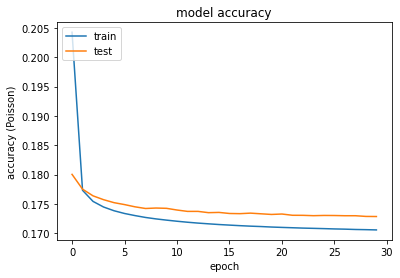

In [9]:
from keras.metrics import Poisson

cae = models.build_CAE(16)
cae.compile(loss='mse', optimizer='adam', metrics=[Poisson()])
history = cae.fit(train_gen, validation_data=test_gen, epochs=n_epochs, verbose=False)

# Plot accuracy
plt.plot(history.history['poisson'])
plt.plot(history.history['val_poisson'])
plt.title('model accuracy')
plt.ylabel('accuracy (Poisson)')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()